<a href="https://colab.research.google.com/github/quetion/time_series_11202/blob/main/%5B5%5D%E5%96%AE%E6%A0%B9%E8%88%87%E9%9A%A8%E6%A9%9F%E8%B6%A8%E5%8B%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# 隨機漫步模型
- 考慮AR(1)模型
$$
y_t = \beta_0 + \beta_1 y_{t-1} + \epsilon_t
$$
  - 當$|\beta_1|<1$，此為定態序列
  - 當$|\beta_1|>1$，此為爆炸序列
  - 當$|\beta_1|=1$，
  $$
  y_t = \beta_0 +y_{t-1} + \epsilon_t
  $$
  此為`隨機漫步模型(random walk model)`
- 此模型具有平賭序列性質 $E_t(y_t+1) = y_t$


## 如何模擬隨機漫步

In [10]:
rw[:5]

array([-0.26465374,  0.06472598,  3.65414612,  0.14003452, -1.54548961])

In [11]:
rw_1[:5]

array([-0.26465374, -0.19992777,  3.45421835,  3.59425288,  2.04876327])

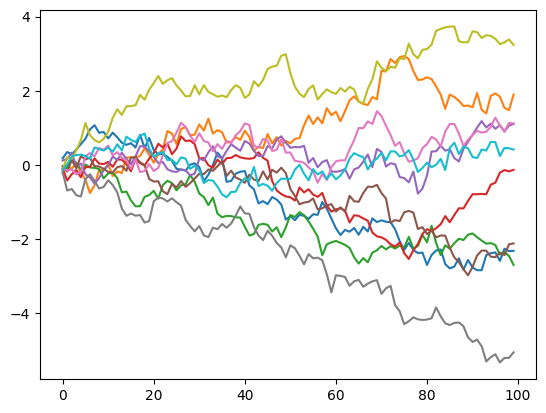

In [13]:
# 生成隨機漫步，長度為100期
for i in range(10):
  sigma = 0.2
  rw = np.random.randn(100)*sigma
  rw_1 = np.cumsum(rw)
  plt.plot(rw_1)

## 隨機漫步是定態的嗎？
- 不是嚴格定態
- 也不是弱定態
- 總體與財務經濟學中，最常用的非定態時間序列模型

# 帶有趨勢的時間序列
- 固定趨勢
$$
y_t = \beta_0 + \beta_1*t + \epsilon_t
$$

- 隨機趨勢

## 單根與隨機趨勢
- 持續且長期性的隨機移動
- 隨機移動就是外生性衝擊
- 每一次的外生性衝擊都會造成長期影響


# 單根所產生的問題
-  小樣本估計的向下偏誤
  - 估計出來的參數通常會被低估
- 虛假回歸
  - 使得原本獨立的兩變數，但透過回歸模型估計，參數居然大概率都會顯著(顯示兩變數存在顯著相關度)



## 估計的向下偏誤

In [3]:
# 生成單根過程
T = 50
sigma = 0.20
yt = (np.random.randn(T)*sigma).cumsum()

In [4]:
yt = pd.DataFrame(yt)

In [8]:
yt.columns = ['ar_simu']

In [ ]:
# 估計AR(1)
y = yt
x = sm.add_constant(yt.shift())
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1785.
Date:                Thu, 06 May 2021   Prob (F-statistic):           4.86e-39
Time:                        11:45:39   Log-Likelihood:                 16.750
No. Observations:                  49   AIC:                            -29.50
Df Residuals:                      47   BIC:                            -25.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0720      0.043     -1.690      0.0

In [ ]:
beta = result.params[0]
#bias = abs(1-beta)
print(beta)

0.9977387591746563


In [ ]:
# 記錄不同T所產生的誤差bias


In [ ]:
xx = pd.Series(np.random.randn(100).cumsum())
yy = pd.Series(np.random.randn(100).cumsum())


In [ ]:
y = yy
x = sm.add_constant(xx)
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     9.019
Date:                Thu, 06 May 2021   Prob (F-statistic):            0.00339
Time:                        12:17:39   Log-Likelihood:                -248.40
No. Observations:                 100   AIC:                             500.8
Df Residuals:                      98   BIC:                             506.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4948      0.441      3.389      0.0

In [ ]:
result.pvalues[0]>0.05

False

# 單根檢定
- 由於時間序列存在單根，這可能導致實證上嚴重的錯誤推論(Nelson and Plosser, 1982)
- 檢定時間序列是否存在單根，是一個重要的統計問題
- 自從1970年代開始，許多檢定方法開始被提出
- 目前最常用的檢定 (ADF檢定)



In [25]:
from statsmodels.tsa.stattools import adfuller

# 下載歐元兌美元的匯率資料
data = yf.download("EURUSD=X",start='1990-01-01')

# 選擇收盤價
data = data[['Adj Close']]
data.columns = ['price_eurusd']



[*********************100%%**********************]  1 of 1 completed


In [26]:
# ADF檢定
result = adfuller(data.price_eurusd.dropna())

# 輸出ADF檢定結果
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# 判斷是否為定態序列
if result[0] < result[4]["5%"]:
    print("序列為定態")
else:
    print("序列非定態")


ADF Statistic: -1.841839
p-value: 0.359897
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
序列非定態


# 如何處理時間序列的單根
- 取一階差分